<a href="https://colab.research.google.com/github/ayuksekdag/python_finance/blob/main/finance1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import dates
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
raw = yf.download('AAPL SPY', start='2023-01-01', end='2023-12-31')
raw2 = yf.download('MSFT', start='2023-01-01', end='2023-12-31')


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
raw2.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-27,373.690002,375.059998,372.809998,374.070007,373.379547,14905400
2023-12-28,375.369995,376.459991,374.160004,375.279999,374.587280,14327000
2023-12-29,376.000000,377.160004,373.480011,376.040009,375.345886,18723000


In [4]:
raw.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [5]:
raw.pipe?

use ? at the end to get help

In [6]:
def fix_cols(df):
  columns = df.columns
  outer = [col[0] for col in columns]
  df.columns = outer
  return df


def tweak_data():
  raw = yf.download('AAPL SPY', start='2023-01-01', end='2023-12-31')
  return (raw
   .iloc[:,::2]
   .pipe(fix_cols)
  )

tweak_data()

[*********************100%%**********************]  2 of 2 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-01-03,124.216293,125.070000,130.899994,124.169998,130.279999,112117500
2023-01-04,125.497498,126.360001,128.660004,125.080002,126.889999,89113600
2023-01-05,124.166641,125.019997,127.769997,124.760002,127.129997,80962700
2023-01-06,128.735229,129.619995,130.289993,124.889999,126.010002,87754700
2023-01-09,129.261627,130.149994,133.410004,129.889999,130.470001,70790800
...,...,...,...,...,...,...
2023-12-22,193.353287,193.600006,195.410004,192.970001,195.179993,37122800
2023-12-26,192.803986,193.050003,193.889999,192.830002,193.610001,28919300
2023-12-27,192.903839,193.149994,193.500000,191.089996,192.490005,48087700


[*********************100%%**********************]  2 of 2 completed


<Axes: xlabel='Date'>

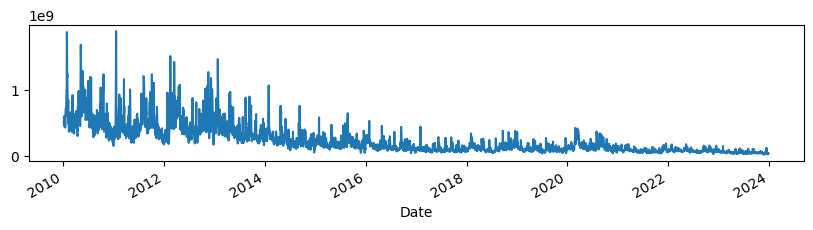

In [7]:
def tweak_data():
  raw = yf.download('AAPL SPY', start='2010-01-01', end='2023-12-31')
  return (raw
   .iloc[:,::2]
          #choose apple
    .pipe(fix_cols)
    .Volume
    .plot(figsize=(10,2))
  )

tweak_data()

resampling
change granilarity


[*********************100%%**********************]  2 of 2 completed


<Axes: xlabel='Date'>

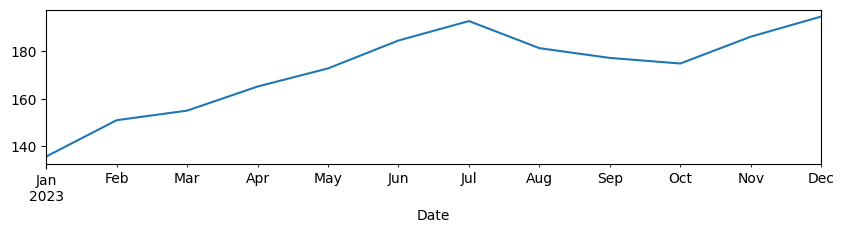

In [8]:
def tweak_data():
  raw = yf.download('AAPL SPY', start='2023-01-01', end='2023-12-31')
  return (raw
   .iloc[:,::2]
          #choose apple
    .pipe(fix_cols)
    .Close
    .resample('M')
    .mean()
    .plot(figsize=(10,2))
  )

tweak_data()

[*********************100%%**********************]  2 of 2 completed


<Axes: xlabel='Date'>

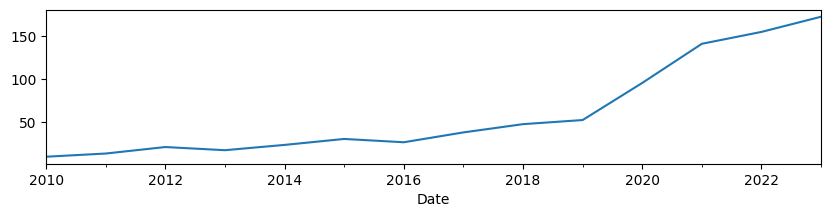

In [9]:
def tweak_data():
  raw = yf.download('AAPL SPY', start='2010-01-01', end='2023-12-31')
  return (raw
   .iloc[:,::2]
          #choose apple
    .pipe(fix_cols)
    .Close
    .resample('Y')
    .mean()
    .plot(figsize=(10,2))
  )

tweak_data()

[*********************100%%**********************]  2 of 2 completed


<Axes: xlabel='Date'>

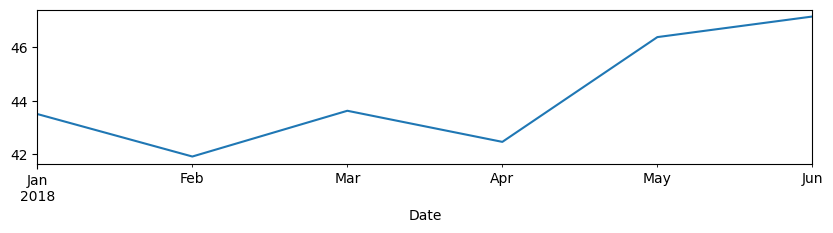

In [21]:
def tweak_data():
  raw = yf.download('AAPL SPY', start='2010-01-01', end='2023-12-31')
  return (raw
   .iloc[:,::2]
          #choose apple
    .pipe(fix_cols)
    .loc['jan 2018' : 'jun 2018']
    .Close
    .resample('M')
    .mean()
    .plot(figsize=(10,2))
  )

tweak_data()